Données > Vectorisation > Decomposition > Feature Extraction > Data Viz

## Data viz 2

`scikit-learn`

Créez un fichier csv, avec 1000 lignes et 300 colonnes, où chaque cellule est un nombre aléatoire entre -1000 et 1000.

In [12]:
import random
import os
import csv

FILE_NAME = "data"
COLS = 300
LIGNES = 1000
MINMAX = [-1000, 1000]

main_list = []

for i in range(LIGNES):
  line = []
  for j in range(COLS):
    line.append(random.randint(MINMAX[0], MINMAX[1]))
  main_list.append(line)

print(main_list)

with open(os.path.join(os.getcwd(), f"{FILE_NAME}.csv"), "w") as f:
  writer = csv.writer(f)
  for row in main_list:
    writer.writerow(row)

[[-730, -516, 601, 541, 396, -523, -878, 883, 102, 515, 955, 199, -661, 810, 862, 655, 933, -48, 234, 325, -382, 195, -335, -303, 662, -805, -852, 431, -284, 339, 201, -888, 244, -398, -780, -220, 99, -416, -339, 196, -115, 590, -938, -400, -940, -873, -517, -536, -762, -766, 712, 702, -542, 446, -405, -742, 905, -911, -939, -447, -182, -159, -517, 799, -709, -761, -830, -759, 666, -330, -719, 270, -992, 301, 232, 328, -543, 96, -411, -544, 149, 318, 117, 678, -782, 648, -32, 73, 524, 511, 279, -413, 919, 394, 525, 179, -641, -189, 178, 630, 276, 445, -160, 593, -714, 820, -369, -967, 341, -574, 651, -701, -721, -219, -234, 927, 311, 102, -402, -311, -397, 458, -868, 872, -474, -749, -484, 580, -521, 423, -1, 789, -31, 875, 722, 991, 529, 675, 945, 962, 770, 654, -59, -292, -649, 918, 946, -978, 615, 752, -243, -32, 847, -298, 625, 839, 86, 649, -290, -865, 821, 89, -660, 319, -268, 182, 528, 129, -346, 162, -928, -555, -773, 403, -911, -177, -123, -185, 104, -165, 302, 733, -651, 849,

Load data
Scikit-learn doit manipuler des arrays numpy, donc il faut convertir en ce format d'abord.

In [14]:
import numpy as np

chemin = os.path.join(os.getcwd(), f"{FILE_NAME}.csv")
raw_data = np.genfromtxt(chemin, delimiter = ",")

print(raw_data)
print(type(raw_data))

[[ -730.  -516.   601. ...   355.  -641.  -388.]
 [  242.   797.    52. ...   296.   423.   674.]
 [  391.   833.   619. ...  -762.  -141.  -783.]
 ...
 [  322.   523.  -307. ... -1000.   775.  -463.]
 [ -794.  -217.  -530. ...   724.    94.   659.]
 [ -796.  -134.   213. ...  -448.   -97.  -800.]]
<class 'numpy.ndarray'>


# Reduction de la dimensionalité

In [17]:
from sklearn.manifold import TSNE

reductor = TSNE(n_components = 2)
reduced = reductor.fit_transform(raw_data)

print(reduced)

[[ 14.196872    -9.124694  ]
 [ -8.675471   -12.003709  ]
 [ -0.72910774   0.67004335]
 ...
 [ -1.2259996   15.573007  ]
 [  1.728374    -6.5320673 ]
 [-14.61279     -2.8485804 ]]


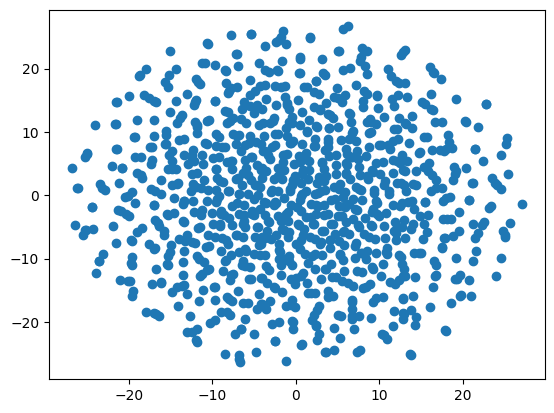

In [18]:
import matplotlib.pyplot as plt
transposed = np.transpose(reduced)
plt.scatter(transposed[0], transposed[1])
plt.show()

# Preprocessing

## Standardization + Min Max

[[0.7598041  0.32566127]
 [0.3367036  0.27137047]
 [0.4836982  0.5103647 ]
 ...
 [0.4745065  0.79139614]
 [0.5291575  0.37455153]
 [0.22687298 0.44401258]]


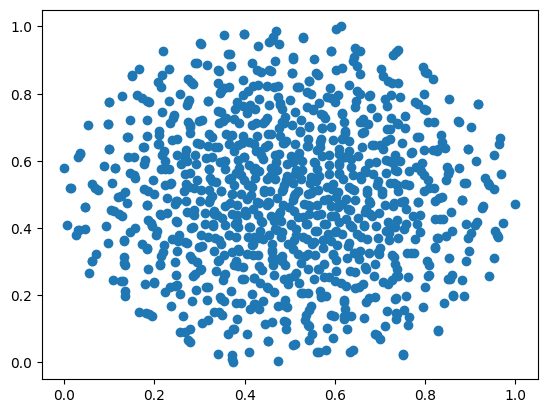

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

normed = MinMaxScaler((0, 1)).fit_transform(reduced)
print(normed)

transposed = np.transpose(normed)
plt.scatter(transposed[0], transposed[1])
plt.show()

In [23]:
stand = StandardScaler().fit_transform(raw_data)
print(stand)



[[-1.23598481 -0.8487152   1.05734244 ...  0.59955583 -1.06195432
  -0.68354803]
 [ 0.4549693   1.41149107  0.1138759  ...  0.49649404  0.73187889
   1.14007554]
 [ 0.71417934  1.4734617   1.08827577 ... -1.35163087 -0.21898758
  -1.3618261 ]
 ...
 [ 0.59414247  0.93982579 -0.50307217 ... -1.76737164  1.32532748
  -0.81233501]
 [-1.34732336 -0.33401476 -0.88630175 ...  1.24412869  0.17720678
   1.11431814]
 [-1.35080269 -0.19113805  0.39055734 ... -0.80313255 -0.14480651
  -1.39101782]]


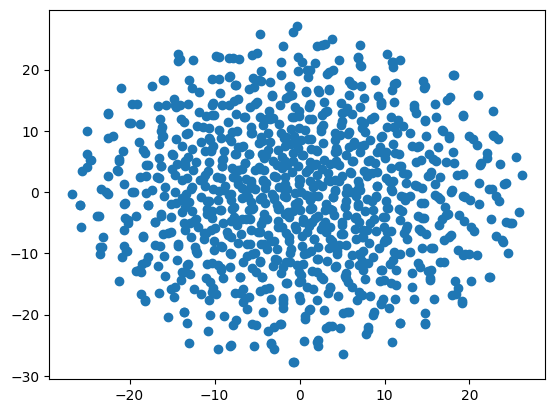

In [24]:
reductor = TSNE(n_components = 2)
reduced = reductor.fit_transform(stand)

transposed = np.transpose(reduced)
plt.scatter(transposed[0], transposed[1])
plt.show()


# Clustering

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5)
clustered = km.fit(reduced)

print(clustered.labels_)

[2 0 1 3 0 3 2 1 2 0 0 4 0 2 3 4 2 1 2 0 1 4 2 3 2 1 1 2 3 3 4 1 3 2 2 2 1
 0 4 2 3 2 1 1 0 2 1 4 1 1 2 2 2 0 3 4 1 0 0 4 4 4 2 3 3 1 4 0 1 0 1 4 3 0
 2 2 3 3 0 4 4 4 2 1 1 3 2 3 0 1 1 2 2 4 1 0 0 1 2 0 2 0 1 2 2 3 2 4 1 2 0
 2 1 1 1 4 3 4 2 1 3 0 4 0 0 4 1 2 0 2 0 1 0 4 0 0 4 3 0 3 2 4 1 2 2 4 1 2
 4 1 2 0 1 4 0 3 1 1 3 1 1 3 4 0 0 2 0 0 0 3 2 3 4 2 2 1 0 1 1 0 2 4 2 4 0
 0 0 4 0 0 3 4 3 0 0 4 3 1 0 1 2 1 1 2 3 2 2 1 3 3 1 2 0 1 1 4 4 1 3 1 3 2
 4 0 1 0 2 3 4 0 0 3 3 2 1 2 1 4 0 1 4 2 0 1 1 4 4 0 0 3 4 3 3 3 0 0 2 4 4
 2 1 3 3 4 0 3 3 1 3 0 4 3 1 2 2 4 2 4 0 4 4 0 1 3 0 3 3 0 3 1 2 3 0 0 2 2
 4 2 2 0 1 1 3 1 3 1 3 2 2 1 1 1 3 3 0 1 2 0 2 3 4 0 1 2 0 1 1 3 4 3 1 2 0
 3 3 4 1 2 2 2 1 2 0 1 0 3 2 2 0 3 3 4 3 1 0 4 2 4 0 2 2 0 2 0 3 0 4 1 1 3
 2 3 4 4 0 1 4 2 0 0 0 4 2 1 1 4 1 1 2 4 3 2 1 0 2 2 3 0 1 1 0 3 1 0 1 0 1
 3 2 3 0 4 0 3 2 1 1 2 4 0 4 2 2 1 4 0 1 4 0 4 1 2 1 0 1 0 4 0 1 2 4 3 4 2
 2 1 3 2 3 4 2 4 1 1 2 0 3 2 0 3 4 4 4 3 4 3 2 1 0 2 2 3 1 0 4 4 3 1 1 2 0
 4 3 1 3 2 1 0 0 1 1 1 2 

In [28]:
cm = {}
used = []

for item in clustered.labels_:
  if item not in used:
    cm[str(item)] = (random.random(), random.random(), random.random())
    used.append(item)

print(cm)

{'2': (0.445067404174338, 0.9580832676680319, 0.5027665542030894), '0': (0.44472758776435517, 0.7910795336449251, 0.7539777953992632), '1': (0.2488065019598995, 0.7839847696073007, 0.5502163195015913), '3': (0.709503066415417, 0.6722898025903637, 0.00032681889638053185), '4': (0.6276478028926114, 0.010126183710836956, 0.8346404124133441)}


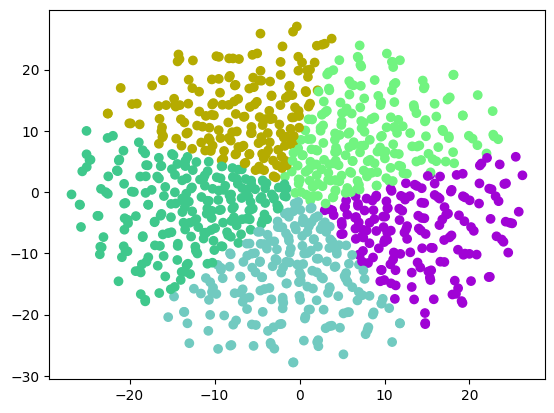

In [29]:
transposed = np.transpose(reduced)
col = []
for item in clustered.labels_:
  col.append(cm[str(item)])
plt.scatter(transposed[0], transposed[1], c= col)
plt.show()